In [14]:
from sympy import *
init_printing()
from IPython.display import display

%matplotlib inline

import matplotlib.pyplot as plt
from tabulate import tabulate

# Equation for Neuron Paper

      A dendritic segment can robustly classify a pattern by subsampling a small number of cells from a larger population.  Assuming a random distribution of patterns, the exact probability of a false match is given by the following equation:


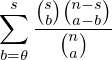

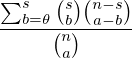

In [2]:
oxp = Symbol("Omega_x'")
b = Symbol("b")
n = Symbol("n")
theta = Symbol("theta")
s = Symbol("s")
a = Symbol("a")

subsampledOmega = (binomial(s, b) * binomial(n - s, a - b)) / binomial(n, a)
subsampledFpF = Sum(subsampledOmega, (b, theta, s))
subsampledOmegaSlow = (binomial(s, b) * binomial(n - s, a - b)) 
subsampledFpFSlow = Sum(subsampledOmegaSlow, (b, theta, s))/ binomial(n, a)

display(subsampledFpF)
display(subsampledFpFSlow)

where n refers to the size of the population of cells, a is the number of active cells at any instance in time, s is the number of actual synapses on a dendritic segment, and θ is the threshold for NMDA spikes. Following   (Ahmad & Hawkins, 2015), the numerator counts the number of possible ways θ or more cells can match a fixed set of s synapses. The denominator counts the number of ways a cells out of n can be active. 
    
## Example usage

In [4]:
display("n=10000, a=64, s=24, theta=12", subsampledFpF.subs(s,24).subs(n, 10000).subs(a, 64).subs(theta, 12).evalf())

'n=10000, a=64, s=24, theta=12'

In [5]:
display("n=10000, a=300, s=24, theta=12", subsampledFpFSlow.subs(theta, 12).subs(s, 24).subs(n, 10000).subs(a, 300).evalf())

'n=10000, a=300, s=24, theta=12'

In [6]:
display("n=2000, a=40, s=20, theta=10", subsampledFpF.subs(theta, 15).subs(s, 20).subs(n, 2000).subs(a, 40).evalf(100))

'n=2000, a=40, s=20, theta=10'

## Table 1B

In [7]:
T1B = subsampledFpFSlow.subs(n, 100000).subs(a, 2000).subs(theta,s).evalf()
print("n=100000, a=2000, theta=s")
display("s=6",T1B.subs(s,6).evalf())
display("s=8",T1B.subs(s,8).evalf())
display("s=10",T1B.subs(s,10).evalf())

n=100000, a=2000, theta=s


's=6'

's=8'

's=10'

## Table 1C

In [8]:
T1C = subsampledFpFSlow.subs(n, 100000).subs(a, 2000).subs(s,2*theta).evalf()
print("n=10000, a=300, s=2*theta")
display("theta=6",T1C.subs(theta,6).evalf())
display("theta=8",T1C.subs(theta,8).evalf())
display("theta=10",T1C.subs(theta,10).evalf())
display("theta=12",T1C.subs(theta,12).evalf())

n=10000, a=300, s=2*theta


'theta=6'

'theta=8'

'theta=10'

'theta=12'

## Table 1D

In [24]:
m = Symbol("m")
T1D = subsampledFpF.subs(n, 100000).subs(a, 2000).subs(s,2*m*theta).evalf()
print("n=100000, a=2000, s=2*m*theta")
display("theta=10, m=2",T1D.subs(theta,10).subs(m,2).evalf())
display("theta=10, m=4",T1D.subs(theta,10).subs(m,4).evalf())
display("theta=10, m=6",T1D.subs(theta,10).subs(m,6).evalf())
display("theta=20, m=6",T1D.subs(theta,20).subs(m,6).evalf())

n=100000, a=2000, s=2*m*theta


'theta=10, m=2'

'theta=10, m=4'

'theta=10, m=6'

'theta=20, m=6'

# Charts for SDR Paper

      The following sections calculates the numbers for some of the SDR paper charts.
      

## Importance of large n


In [21]:
eq1 = subsampledFpFSlow.subs(s, 64).subs(theta, 12)
print("a=64 cells active, s=16 synapses on segment, dendritic threshold is theta=8\n")
errorList = []
nList = []
table = [["n", "sparsity", "prob(fp)"]]
for n0 in range(300,20100,200):
    error = eq1.subs(n, n0).subs(a,64).evalf()
    errorList += [error]
    nList += [n0]
    table.append([n0, 64/n0, error])

print (tabulate(table, headers="firstrow", tablefmt="grid"))
print(errorList)
print(nList)

a=64 cells active, s=16 synapses on segment, dendritic threshold is theta=8

+-------+------------+-------------+
|     n |   sparsity |    prob(fp) |
+=======+============+=============+
|   300 | 0.213333   | 0.767798    |
+-------+------------+-------------+
|   500 | 0.128      | 0.0960845   |
+-------+------------+-------------+
|   700 | 0.0914286  | 0.00881794  |
+-------+------------+-------------+
|   900 | 0.0711111  | 0.00104201  |
+-------+------------+-------------+
|  1100 | 0.0581818  | 0.000161867 |
+-------+------------+-------------+
|  1300 | 0.0492308  | 3.16122e-05 |
+-------+------------+-------------+
|  1500 | 0.0426667  | 7.42838e-06 |
+-------+------------+-------------+
|  1700 | 0.0376471  | 2.02811e-06 |
+-------+------------+-------------+
|  1900 | 0.0336842  | 6.26297e-07 |
+-------+------------+-------------+
|  2100 | 0.0304762  | 2.14288e-07 |
+-------+------------+-------------+
|  2300 | 0.0278261  | 7.99418e-08 |
+-------+------------+-------------

## n = a/2

In [23]:
eq1 = subsampledFpFSlow.subs(s, 24).subs(theta, 12)
print ("a=n/2 cells active, s=24 synapses on segment, dendritic threshold is theta=12\n")
errorList = []
nList = []
table = [["n", "sparsity", "prob(fp)"]]
for n0 in range(300,3700,200):
    error = eq1.subs(n, n0).subs(a,n0/2).evalf()
    errorList += [error]
    nList += [n0]
    table.append([n0, (n0/2)/n0, error])

print (tabulate(table, headers="firstrow", tablefmt="grid"))
print (errorList)
print (nList)

a=n/2 cells active, s=24 synapses on segment, dendritic threshold is theta=12

+------+------------+------------+
|    n |   sparsity |   prob(fp) |
+======+============+============+
|  300 |        0.5 |   0.584015 |
+------+------------+------------+
|  500 |        0.5 |   0.582595 |
+------+------------+------------+
|  700 |        0.5 |   0.582007 |
+------+------------+------------+
|  900 |        0.5 |   0.581686 |
+------+------------+------------+
| 1100 |        0.5 |   0.581484 |
+------+------------+------------+
| 1300 |        0.5 |   0.581344 |
+------+------------+------------+
| 1500 |        0.5 |   0.581242 |
+------+------------+------------+
| 1700 |        0.5 |   0.581165 |
+------+------------+------------+
| 1900 |        0.5 |   0.581104 |
+------+------------+------------+
| 2100 |        0.5 |   0.581055 |
+------+------------+------------+
| 2300 |        0.5 |   0.581014 |
+------+------------+------------+
| 2500 |        0.5 |   0.58098  |
+------+---

## Small sparsity is insufficient

In [11]:
print ("2% sparsity with n=400")
print subsampledFpFSlow.subs(s, 4).subs(a, 8).subs(theta, 2).subs(n,400).evalf()
print ("2% sparsity with n=4000")
print subsampledFpFSlow.subs(s, 4).subs(a, 400).subs(theta, 2).subs(n,4000).evalf()


2% sparsity with n=400
0.00206314616966578
2% sparsity with n=4000
0.0522148720308419


## A small subsample can be very reliable (but not too small)

In [12]:
eq2 = subsampledFpFSlow.subs(n, 10000).subs(a, 300)
print("a=200 cells active out of population of n=10000 cells\n")
errorList = []
sList = []
for s0 in range(2,31,1):
    print "synapses s = %3d, theta = s/2 = %3d, probability of false match = "%(s0,s0/2), eq2.subs(s, s0).subs(theta,s0/2).evalf() 
    errorList += [eq2.subs(s, s0).subs(theta,s0/2).evalf()]
    sList += [s0]
    
print (errorList)
print (sList)



a=200 cells active out of population of n=10000 cells

synapses s =   2, theta = s/2 =   1, probability of false match =  0.0591029102910291
synapses s =   3, theta = s/2 =   1, probability of false match =  0.0873354694941389
synapses s =   4, theta = s/2 =   2, probability of false match =  0.00517101241148655
synapses s =   5, theta = s/2 =   2, probability of false match =  0.00844794620736664
synapses s =   6, theta = s/2 =   3, probability of false match =  0.000499865412306804
synapses s =   7, theta = s/2 =   3, probability of false match =  0.000855357919350205
synapses s =   8, theta = s/2 =   4, probability of false match =  5.05282906751424e-5
synapses s =   9, theta = s/2 =   4, probability of false match =  8.88044155296650e-5
synapses s =  10, theta = s/2 =   5, probability of false match =  5.23462085992797e-6
synapses s =  11, theta = s/2 =   5, probability of false match =  9.36152430040881e-6
synapses s =  12, theta = s/2 =   6, probability of false match =  5.504677

## Impact of noise on false negatives

In [13]:
b = Symbol("b")
v = Symbol("v")
theta = Symbol("theta")
s = Symbol("s")
a = Symbol("a")

overlapSetNoise = (binomial(s, b) * binomial(a - s, v - b)) / binomial(a, v)
noiseFN = Sum(overlapSetNoise, (b, s-theta+1, s))

In [14]:
eqn = noiseFN.subs(s, 30).subs(a, 128)
print ("a=128 cells active with segment containing s=30 synapses (n doesn't matter here)\n")
for t in range(8,20,4):
    print ("theta = ",t)
    errorList = []
    noiseList = []
    noisePct = 0.05
    while noisePct <= 0.85:
        noise = int(round(noisePct*128,0))
        errorList += [eqn.subs(v, noise).subs(theta,t).evalf()]
        noiseList += [noise/128.0]
        noisePct += 0.05
    print (errorList)
    print (noiseList)


a=128 cells active with segment containing s=30 synapses (n doesn't matter here)

theta =  8
[0, 0, 0, 3.11341516283240e-16, 2.23243424464799e-12, 7.90168637530306e-10, 1.20695707971664e-7, 3.45576265561118e-6, 8.08202472708491e-5, 0.000735429456875121, 0.00464043435771348, 0.0268657157114204, 0.0896352007201254, 0.263952754229579, 0.508714577385333, 0.770861966941236]
[0.046875, 0.1015625, 0.1484375, 0.203125, 0.25, 0.296875, 0.3515625, 0.3984375, 0.453125, 0.5, 0.546875, 0.6015625, 0.6484375, 0.703125, 0.75, 0.796875]
theta =  12
[0, 0, 2.48810797387309e-15, 7.92695349343630e-10, 2.16302525195240e-7, 1.09248135880715e-5, 0.000314435369055385, 0.00279559866084888, 0.0198782675563797, 0.0716985160403564, 0.190430462690358, 0.426525969583828, 0.664766152465367, 0.880922510721824, 0.970339402698393, 0.996376835285247]
[0.046875, 0.1015625, 0.1484375, 0.203125, 0.25, 0.296875, 0.3515625, 0.3984375, 0.453125, 0.5, 0.546875, 0.6015625, 0.6484375, 0.703125, 0.75, 0.796875]
theta =  16
[0, 0,

# Impact of noise on first-order TMs trained on one sequence
We assume that false positives are impossible -- this is in fact not strictly true, but the number of segments is so low that it might as well be.

In [15]:
eqn = noiseFN
eqn = eqn.subs(s, 20).subs(a, 40).subs(c, 40)
for t in range(8, 20, 4):
    print "theta = ",t
    errorList = []
    jaccardSimilarityList = []
    noiseList = []
    noisePct = 0.00
    while noisePct <= 1:
        noise = int(round(noisePct*40,0))
        error = eqn.subs(v, noise).subs(theta,t).evalf()
        errorList.append(error)
        jaccardSimilarity = 1 - error
        jaccardSimilarityList.append(jaccardSimilarity)
        noiseList += [noise/40.0]
        noisePct += 0.05
    print errorList
    print jaccardSimilarityList
    print noiseList

NameError: name 'c' is not defined

# Charts for BAMI

In [16]:
w0 = 32
print ("a=%d cells active, s=%d synapses on segment, dendritic threshold is s/2\n" % (w0,w0))
errorList = []
nList = []
for n0 in range(50,500,50):
    w0 = n0/2
    eq1 = subsampledFpFSlow.subs(s, w0).subs(theta, w0/2)
    error = eq1.subs(n, n0).subs(a,w0).evalf()
    errorList += [error]
    nList += [n0]
    print ("population n = %5d, sparsity = %7.4f%%, probability of false match = "%(n0, float(w0)/n0), error)
    
print (errorList)
print (nList)

a=32 cells active, s=32 synapses on segment, dendritic threshold is s/2

population n =    50, sparsity =  0.5000%, probability of false match =  0.713930783595416
population n =   100, sparsity =  0.5000%, probability of false match =  0.579192330580665
population n =   150, sparsity =  0.5000%, probability of false match =  0.627949560779490
population n =   200, sparsity =  0.5000%, probability of false match =  0.556207787852021
population n =   250, sparsity =  0.5000%, probability of false match =  0.599827556589778
population n =   300, sparsity =  0.5000%, probability of false match =  0.545950866779313
population n =   350, sparsity =  0.5000%, probability of false match =  0.584632630831763
population n =   400, sparsity =  0.5000%, probability of false match =  0.539819496834182
population n =   450, sparsity =  0.5000%, probability of false match =  0.574768441538204
[0.713930783595416, 0.579192330580665, 0.627949560779490, 0.556207787852021, 0.599827556589778, 0.5459508667

# Union Property Math
Here, we calculate the expected error rates for unions of various sizes, with varying dimensions and sparsities.
This is used in plots for the Neuron paper.

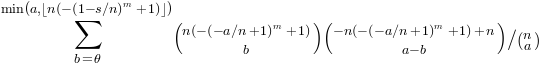

In [17]:
oxd = Symbol("omega")
n = Symbol("n")
a = Symbol("a")
b = Symbol("b")
theta = Symbol("theta")
s = Symbol("s")
m = Symbol("m")
q = Symbol("q")

p = (1 - a/n) ** m
ss = Min(floor((1 - (1 - s/n)**m)*n), a)

expectedUnionOverlap =  binomial(((1 - p)*n), b) * binomial(((n - (1 - p)*n)), a - b) / binomial(n, a)
expectedUnionFP = Sum(expectedUnionOverlap, (b, theta, ss))

display(expectedUnionFP)

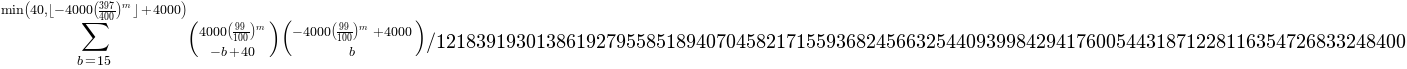

0 0
1 0.000000000000000000001745032216871438090517748709430240184404544869372092932990501764967163185476624815904215229805420692
2 0.0000000000000002093468685928811801989717729017516091277687796544570405122615488775764198833250143098252085743081943
3 0.0000000000001091758776979344433495190028335131313256945573398716353241939392444505507255409008113375381478068025
4 0.000000000007575918762457399263916640767599584844271471997036011048438470323012907960591826464196106810238596218
5 0.0000000001814421512098364828902010548712515048686609396337277833566447515902789676799747568196961072283645763
6 0.000000002248520791277327492290796623999930059599315117596382321155353679106977615017740475810202854920301505
7 0.00000001779329137132590681767775746815254927118928197200267985021165612640886614001871820394749448092383756
8 0.0000001017201482488728819151737506974190201700891964811656321916877721839928071431788182545666671963198185
9 0.0000004544626711472886148782943170010378460105169655813186634988

KeyboardInterrupt: 

In [18]:
eq1 = expectedUnionFP.subs(a, 40).subs(n, 4000).subs(theta, 15).subs(s, 30)
display(eq1)

for num_patterns in range(100):
    eq2 = eq1.subs(m, num_patterns)
    #display(eq2)
    error_prob = eq2.evalf(100)
    print num_patterns, error_prob

In [19]:
eq1 = p.subs(a, 40).subs(n, 4000)
for num_patterns in range(100):
    expected_distinct = eq1.subs(m, num_patterns).evalf(10)
    print (num_patterns, expected_distinct, (1 - expected_distinct))

0 1.000000000 0
1 0.9900000000 0.01000000000
2 0.9801000000 0.01990000000
3 0.9702990000 0.02970100000
4 0.9605960100 0.03940399000
5 0.9509900499 0.04900995010
6 0.9414801494 0.05851985060
7 0.9320653479 0.06793465209
8 0.9227446944 0.07725530557
9 0.9135172475 0.08648275251
10 0.9043820750 0.09561792499
11 0.8953382543 0.1046617457
12 0.8863848717 0.1136151283
13 0.8775210230 0.1224789770
14 0.8687458128 0.1312541872
15 0.8600583546 0.1399416454
16 0.8514577711 0.1485422289
17 0.8429431934 0.1570568066
18 0.8345137615 0.1654862385
19 0.8261686238 0.1738313762
20 0.8179069376 0.1820930624
21 0.8097278682 0.1902721318
22 0.8016305895 0.1983694105
23 0.7936142836 0.2063857164
24 0.7856781408 0.2143218592
25 0.7778213594 0.2221786406
26 0.7700431458 0.2299568542
27 0.7623427143 0.2376572857
28 0.7547192872 0.2452807128
29 0.7471720943 0.2528279057
30 0.7397003734 0.2602996266
31 0.7323033697 0.2676966303
32 0.7249803360 0.2750196640
33 0.7177305326 0.2822694674
34 0.7105532273 0.28944677

# Expected performance for first-order TMs with varying sparsity

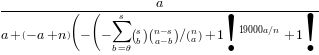

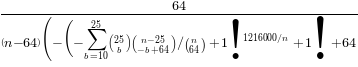

[
300 0.2133333333 4053.33333333333 1.00000000000000
400 0.1600638971 3040.00000000000 0.999524764597103
500 0.1888256286 2432.00000000000 0.630589545802401
600 0.4262461218 2026.66666666667 0.160723868815488
700 0.7258061642 1737.14285714286 0.0380154287753211
800 0.8951305190 1520.00000000000 0.0101874364838613
900 0.9609518686 1351.11111111111 0.00311080162482483
1000 0.9846976836 1216.00000000000 0.00106257204324782
1100 0.9935867156 1105.45454545455 0.000398744719297588
1200 0.9971328657 1013.33333333333 0.000161993146411579
1300 0.9986419067 935.384615384615 7.04176141864219e-5
1400 0.9993231120 868.571428571429 3.24477365229332e-5
1500 0.9996471912 810.666666666667 1.57296170224554e-5
1600 0.9998086985 760.000000000000 7.97242199767715e-6
1700 0.9998925696 715.294117647059 4.20310689761942e-6
1800 0.9999377508 675.555555555556 2.29504468162097e-6
1900 0.9999629020 640.000000000000 1.29322365878282e-6
2000 0.9999773229 608.000000000000 7.49672456579212e-7
2100 0.9999858153 579.04

In [53]:
eq1 = subsampledFpF
expected_num_segments_per_cell = (19*1000)*a/n
eq2 = 1 - ((1 - subsampledFpF)**expected_num_segments_per_cell)
jaccard = a/(a + eq2*(n - a))
display(jaccard)
jaccard2 = jaccard.subs(a, 64).subs(theta, 10).subs(s, 25)
display(jaccard2)
print ("[")
for i in range(300, 4100, 100):
    eq4 = jaccard2.subs(n, i)
    print (i, str(eq4.evalf(10)), expected_num_segments_per_cell.subs(a, 64).subs(n, i).evalf(), eq2.subs(a, 64).subs(theta, 10).subs(s, 25).subs(n, i).evalf())
print ("]")